Problem statement:
Till now you have seen that how to solve the linear regression and regularization problem. Now in this project, you are going to predict the Insurance claim using logistic regression. This dataset contains information on the insurance claim. each observation is different policyholders with various features like the age of the person, the gender of the policyholder, body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.

The dataset has details of 1338 Insurance claim with 8 features. You need to predict the Insurance Claim (Yes:1/No:0)

About the dataset
A zipped file containing the following items is given:

train.csv
The data file train.csv contains the 1070 instances with the 8 features including the target feature.

test.csv
The datafile test.csv contains the 268instances with the 7 features excluding the target feature.

sample_submission.csv
Explained under the Submission sub-heading

LogisticDataDictionary.csv
The file contains data dictionary(Dictionary explaining what each feature of the dataset means) of the Insurance Claim dataset

logistic_regression_student_template.ipynb
A template notebook explaining the task breakdown to solve the given problem statement (Learners are recommended to use it)

Submission
After training the model on train.csv data, the learner has to predict the target feature of the test.csv data using the trained model. The learner has to then submit a csv file with the predicted feature.

Sample submission file(sample_submission.csv) is given to you as a reference to the format expected when you submit

Evaluation metrics
For this particular dataset we are using roc_auc_score as the evaluation metric.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

Reading the train & the test data

In [ ]:
train_path="/content/drive/MyDrive/Colab_Notebooks/train_insurance.csv"
test_path="/content/drive/MyDrive/Colab_Notebooks/test_insurance.csv"
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)

In [ ]:
df_train.head()

,Id,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,1182,25,0,30.30,0,0,3,2632.9920,1
1,990,26,0,19.80,1,0,3,3378.9100,0
2,123,44,1,31.35,1,1,0,39556.4945,1
3,184,44,1,30.69,2,0,2,7731.4271,0
4,1167,29,0,24.60,2,0,3,4529.4770,0


Checking the null values in both train & test data

In [ ]:
df_train.isnull().sum()

Id                0
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Id          0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df_train.shape

(1070, 9)

In [ ]:
df_test.shape

(268, 8)

EDA & Data Preprocessing
Check for the categorical & continuous features.
Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efd0f6cb400>,
      dtype=object)

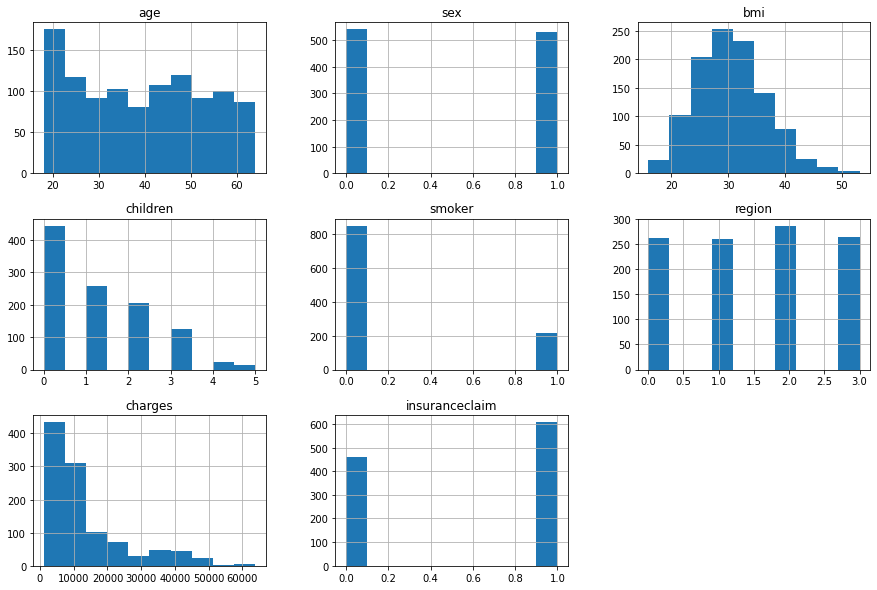

In [ ]:
cols = ['age','sex','bmi','children','smoker','region','charges','insuranceclaim']
df_train[cols].hist(figsize=(15,10))

We can see that the categorical columns are sex, children, smoker, region & insurance claim

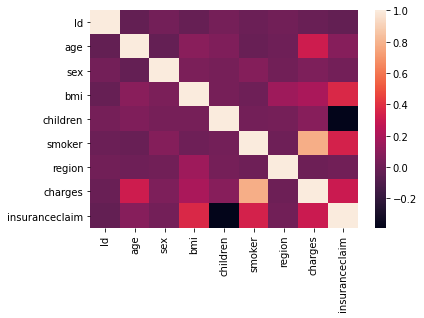

In [ ]:
corr=df_train.corr()
sns.heatmap(corr)

There is no correlation between the variables

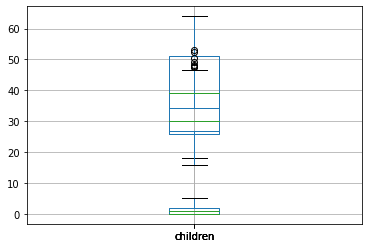

In [ ]:
##Data pre-processing removing outliers & checking for skewness
df_train.boxplot(["age"])
df_train.boxplot(["sex"])
df_train.boxplot(["bmi"])
df_train.boxplot(["children"])

Removing the outliers using Z score

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_train))

print(z)
threshold = 3
print(np.where(z > 3))
df_train = df_train[(z < 3).all(axis=1)]

[[1.33245407 1.00617372 0.99069747 ... 1.33677908 0.87703442 0.87170432]
 [0.83412912 0.93446214 0.99069747 ... 1.33677908 0.81549145 1.14717798]
 [1.41611949 0.35634621 1.00938988 ... 1.36710299 2.16938867 0.87170432]
 ...
 [1.14619348 1.36030826 0.99069747 ... 0.43548505 0.90463599 0.87170432]
 [0.11519156 1.36473159 1.00938988 ... 1.36710299 0.93054297 0.87170432]
 [0.61611195 0.86275057 1.00938988 ... 1.36710299 0.69437131 1.14717798]]
(array([ 50,  71, 265, 266, 280, 348, 358, 367, 408, 504, 567, 670, 681,
       722, 731, 735, 754, 768, 841, 855, 862, 866, 878, 891, 952, 960]), array([4, 4, 7, 4, 4, 7, 4, 4, 4, 3, 7, 4, 7, 7, 4, 4, 3, 4, 4, 4, 7, 3,
       4, 7, 3, 4]))


Checking the skewness

mu = 13031.20 and sigma = 11638.26
Skewness: 1.421544
Kurtosis: 1.198829


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


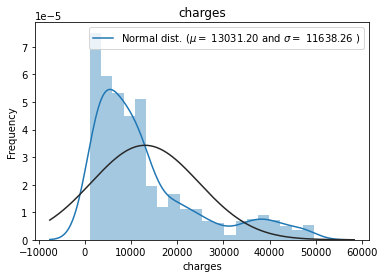

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats   
import scipy.special 

sns.distplot(df_train['charges'], fit=scipy.stats.norm);

# fit a gaussian function to Rental Price
(mu, sigma) = scipy.stats.norm.fit(df_train['charges'])

# mean, std, skewness and kurtosis
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print("Skewness: %f" % df_train['charges'].skew())
print("Kurtosis: %f" % df_train['charges'].kurt())

# plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('charges')
plt.show()

Log transforming charges

In [ ]:
#df_train["log_charges"]=np.log(df_train["charges"])
#df_test["log_charges"]=np.log(df_test["charges"])
#sns.distplot(df_train["log_charges"], fit=scipy.stats.norm);

# fit a gaussian function to Rental Price
#(mu, sigma) = scipy.stats.norm.fit(df_train["log_charges"])

# mean, std, skewness and kurtosis
#print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
#print("Skewness: %f" % df_train["log_charges"].skew())
#print("Kurtosis: %f" % df_train["log_charges"].kurt())

# plot the distribution
#plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#            loc='best')
#plt.ylabel('Frequency')
#plt.title('Charges')
#plt.show()

In [ ]:
#df_train.drop(["charges"],axis=1,inplace=True)
#df_test.drop(["charges"],axis=1,inplace=True)

Dropping ID 

In [ ]:
df_train.drop(["Id"],axis=1,inplace=True)
df_test.drop(["Id"],axis=1,inplace=True)

In [ ]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,25,0,30.30,0,0,3,2632.9920,1
1,26,0,19.80,1,0,3,3378.9100,0
2,44,1,31.35,1,1,0,39556.4945,1
3,44,1,30.69,2,0,2,7731.4271,0
4,29,0,24.60,2,0,3,4529.4770,0


Splitting into train & test data, independant variables(feastures on X), dependant variable(target on y)

In [ ]:
X=df_train[["age","sex","bmi","children","smoker","region","charges"]]
y=df_train[["insuranceclaim"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
scaler =MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model prediction

In [ ]:
model =LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(y_pred)

[0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing the model with ROC accuracy

In [ ]:
roc_auc_score(y_test, y_pred)

0.8780657748049052

In [ ]:
y_pred_test = model.predict(df_test)
print(y_pred_test)
submissions_f = pd.DataFrame(y_pred_test,columns = ['insuranceclaim'])
print(submissions_f)
submissions_f.to_csv("/content/drive/MyDrive/Colab_Notebooks/sample_submission_insurance.csv")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
     insuranceclaim
0                 1
1                 1
2                 1
3                 1
4                 1
..              ...
263               1
264               1
265               1
266               1
267               1

[268 rows x 1 columns]
